#Fall 2023 MSBA 605 Final

### Enter your name: OLAPEJU ESUOLA



### **Requirements:**

*  For the data cleaning, you are required to clean the data in a manner that would facilitate all future analyses.
*  For each analysis, you are required to perform any data transformations, create an appropriate visualization, and interpret the results by describing any data patterns.
  *   Statistical analyses will be worth +2 extra credit each (for a total of 6 points) but must be the appropriate analysis, conducted properly, and interpreted
*  For Future directions, you are required to provide two future analyses based on what is available in the data and your previous conclusions.

### **Scenario:**
You were just hired as a data analyst for a local public school system. The school system has been collecting data on student test scores for the past two years, along with other demographic variables of interest. They have just finished the second year of data collection and are ready for you to conduct some analyses.

### **Data Info:**
There are two data files, one from each year. Both contain the same type of data. The following columns are present in each data file:


1.   gender: with two values (male/m,female/f)
2.   race/ethnicity: with five values (group A,group B,group C,group D,group E)
3.   parental level of education: with six values (some high school,high school,some college,associate's degree,bachelor's degree,master's degree)
4.   lunch: with two values (standard,free/reduced)
5.   test preparation course: with two values (completed,none)  
6.   math score: continuous
7.   reading score: continuous
8.   writing score: continuos
9.   year: year 1 OR year 2 depending on which data file

There were some minor errors when recording the data. For one year, you only received a list of students with free/reduced lunch, but you can safely assume that those without 'free/reduced' listed had the 'standard' lunch.

You ran into a similar situation in another year where you only received a list of students who completed the test preparation course, but you can safely assume those without 'completed' listed did not complete a test preparation course.

Finally, one year they recorded gender as male/female and one year they recorded gender as m/f.


###**Data Cleaning:** Before you start on your analyses, clean the data as necessary and combine the data sets. Unless otherwise specified, use the combined data in subsequent analyses.

In [114]:
import pandas as pd #pandas import
import numpy as np #numpy import
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import os
pd.set_option('display.max_columns', None)

In [115]:
# Clean up the data for each data frame by filling up the empty slots with the appropriate values and setting values to be in the same format
# df1- fill up missing data with 'standard'
#os.chdir('/Users/lape/Desktop/MSBA/python/FINALS')
df1=pd.read_csv('year1studentperformance.csv')
df1=df1.fillna('standard')
df1.head()

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score,year
0,male,group A,high school,standard,completed,67,67,63,year 1
1,female,group D,some high school,free/reduced,none,40,59,55,year 1
2,male,group E,some college,free/reduced,none,59,60,50,year 1
3,male,group B,high school,standard,none,77,78,68,year 1
4,male,group E,associate's degree,standard,completed,78,73,68,year 1


In [116]:
# Checking for missing data in df1
missing_data1= df1.isnull().sum()
print(missing_data1)
# from the output, there is no missing data

gender                         0
race.ethnicity                 0
parental.level.of.education    0
lunch                          0
test.preparation.course        0
math.score                     0
reading.score                  0
writing.score                  0
year                           0
dtype: int64


In [117]:
# df2- fill up missing data with 'none'
# Setting the values in the dfs to the same format by replacing f with female and m with male in df2
df2=pd.read_csv('year2studentperformance.csv')
df2=df2.fillna('none')
df2['gender'] = df2['gender'].replace('m', 'male')
df2['gender'] = df2['gender'].replace('f', 'female')
df2.head()

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score,year
0,female,group B,bachelor's degree,standard,none,72,72,74,year 2
1,female,group C,some college,standard,completed,69,90,88,year 2
2,female,group B,master's degree,standard,none,90,95,93,year 2
3,male,group A,associate's degree,free/reduced,none,47,57,44,year 2
4,male,group C,some college,standard,none,76,78,75,year 2


In [118]:
# Checking for missing data in df2
missing_data2= df2.isnull().sum()
print(missing_data2)
# from the output, there is no missing data

gender                         0
race.ethnicity                 0
parental.level.of.education    0
lunch                          0
test.preparation.course        0
math.score                     0
reading.score                  0
writing.score                  0
year                           0
dtype: int64


In [119]:
# Combine datasets
combined_dfs= pd.concat([df1, df2], ignore_index=True)
combined_dfs

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score,year
0,male,group A,high school,standard,completed,67,67,63,year 1
1,female,group D,some high school,free/reduced,none,40,59,55,year 1
2,male,group E,some college,free/reduced,none,59,60,50,year 1
3,male,group B,high school,standard,none,77,78,68,year 1
4,male,group E,associate's degree,standard,completed,78,73,68,year 1
...,...,...,...,...,...,...,...,...,...
1995,female,group E,master's degree,standard,completed,88,99,95,year 2
1996,male,group C,high school,free/reduced,none,62,55,55,year 2
1997,female,group C,high school,free/reduced,completed,59,71,65,year 2
1998,female,group D,some college,standard,completed,68,78,77,year 2


### **Analysis 1:** Choose one of the categorical variables in our data set and determine if the sum of all scores differs based on those groups.

In [120]:
# Create a new coloumn containg the total score
combined_dfs['Total_Score'] = combined_dfs[['math.score','reading.score','writing.score']].sum(axis=1)
combined_dfs

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score,year,Total_Score
0,male,group A,high school,standard,completed,67,67,63,year 1,197
1,female,group D,some high school,free/reduced,none,40,59,55,year 1,154
2,male,group E,some college,free/reduced,none,59,60,50,year 1,169
3,male,group B,high school,standard,none,77,78,68,year 1,223
4,male,group E,associate's degree,standard,completed,78,73,68,year 1,219
...,...,...,...,...,...,...,...,...,...,...
1995,female,group E,master's degree,standard,completed,88,99,95,year 2,282
1996,male,group C,high school,free/reduced,none,62,55,55,year 2,172
1997,female,group C,high school,free/reduced,completed,59,71,65,year 2,195
1998,female,group D,some college,standard,completed,68,78,77,year 2,223


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'high school'),
  Text(1, 0, 'some high school'),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

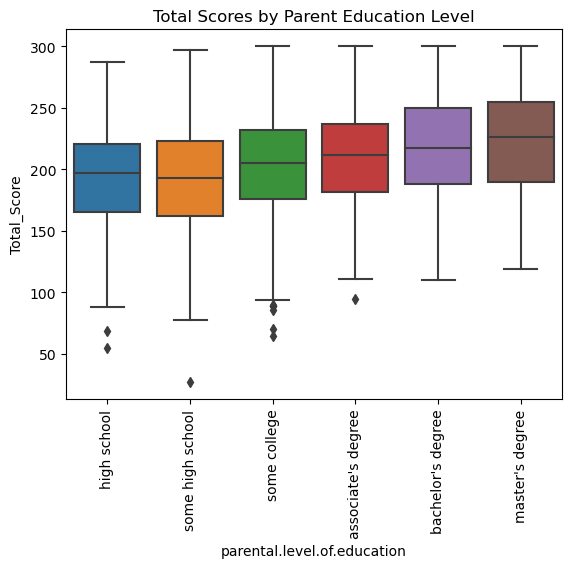

In [121]:
# Category of interest- level of parent's education
# Testing to see if the sum of all scores differs in levels of parent's education
# Create a boxplot visualize the total scores across different levels of parent's education
plt.figure()
sns.boxplot(x='parental.level.of.education', y='Total_Score', data=combined_dfs)
plt.title('Total Scores by Parent Education Level')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'high school'),
  Text(1, 0, 'some high school'),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

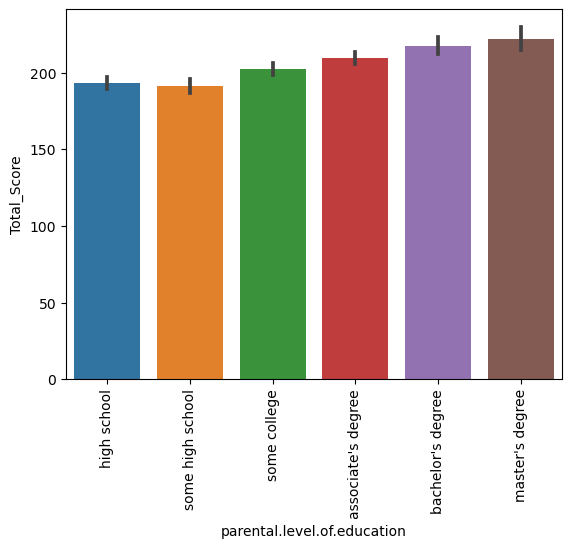

In [122]:
# ANOVA STATISTICAL ANALYSIS 
# plotting means of group
sns.barplot(data=combined_dfs,y='Total_Score',x='parental.level.of.education')
plt.xticks(rotation=90)

<Axes: xlabel='Total_Score', ylabel='Count'>

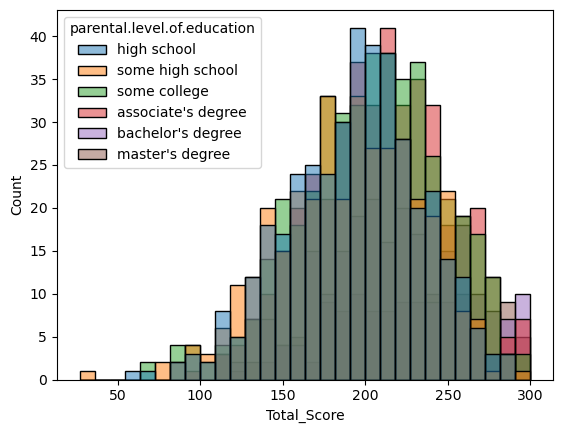

In [123]:
##visualizing distributions
sns.histplot(data=combined_dfs,x='Total_Score',hue='parental.level.of.education')

In [124]:
# Testing to see if each group are normally distributed
# Defining groups
HS=combined_dfs['Total_Score'][combined_dfs['parental.level.of.education']=='high school']
SHS=combined_dfs['Total_Score'][combined_dfs['parental.level.of.education']=='some high school']
SC=combined_dfs['Total_Score'][combined_dfs['parental.level.of.education']=='some college']
AD=combined_dfs['Total_Score'][combined_dfs['parental.level.of.education']=="associate's degree"]
BD=combined_dfs['Total_Score'][combined_dfs['parental.level.of.education']=="bachelor's degree"]
MD=combined_dfs['Total_Score'][combined_dfs['parental.level.of.education']=="master's degree"]
# Testing normality
print(ss.normaltest(HS))
print(ss.normaltest(SHS))
print(ss.normaltest(SC))
print(ss.normaltest(AD))
print(ss.normaltest(BD))
print(ss.normaltest(MD))

NormaltestResult(statistic=7.113101035488345, pvalue=0.02853709332588796)
NormaltestResult(statistic=5.442356822467121, pvalue=0.06579717259640669)
NormaltestResult(statistic=10.093158128652338, pvalue=0.006431296910067096)
NormaltestResult(statistic=8.1582351150012, pvalue=0.0169223921038532)
NormaltestResult(statistic=3.9593738244867467, pvalue=0.13811247186641343)
NormaltestResult(statistic=8.54017049319071, pvalue=0.013980591304728734)


Interpretaion: For groups; HS,SC, $ MD Data is not consistent
For groups; SHS,AD, & BD data is consistent with a normal distribution

In [125]:
#testing for similar variance
print(ss.levene(HS,SHS,SC,AD,BD,MD))

LeveneResult(statistic=1.0906757728171756, pvalue=0.36345640864051937)


Interpretation: pvalue is greater than .05; fail to reject null. Hence, groups have similar variances.

In [126]:
# Testing to see if data is significantly different
print(ss.f_oneway(HS,SC,MD,SHS,AD,BD))

F_onewayResult(statistic=22.848971919769618, pvalue=2.3127564451631787e-22)


Interpretation: pvalue is less than .05; hence, there is a significant difference in total score based on the level of parent's education.

In [127]:
tukres=ss.tukey_hsd(HS,SC,MD,SHS,AD,BD)
print(tukres)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -9.342     0.016   -17.598    -1.087
 (0 - 2)    -28.503     0.000   -40.646   -16.361
 (0 - 3)      2.073     0.984    -6.583    10.728
 (0 - 4)    -16.194     0.000   -24.553    -7.834
 (0 - 5)    -24.352     0.000   -34.279   -14.426
 (1 - 0)      9.342     0.016     1.087    17.598
 (1 - 2)    -19.161     0.000   -31.137    -7.186
 (1 - 3)     11.415     0.002     2.995    19.834
 (1 - 4)     -6.851     0.154   -14.967     1.264
 (1 - 5)    -15.010     0.000   -24.732    -5.288
 (2 - 0)     28.503     0.000    16.361    40.646
 (2 - 1)     19.161     0.000     7.186    31.137
 (2 - 3)     30.576     0.000    18.322    42.830
 (2 - 4)     12.310     0.042     0.262    24.357
 (2 - 5)      4.151     0.947    -9.032    17.334
 (3 - 0)     -2.073     0.984   -10.728     6.583
 (3 - 1)    -11.415     0.002   -19.834    -2.995
 (3 - 2)    -30.576     0.000   

### **Analysis 2:** Pick two of the scores (math, writing, or reading) and determine if they are related.

Text(0.5, 1.0, 'Relationship between Reading and Writing Scores')

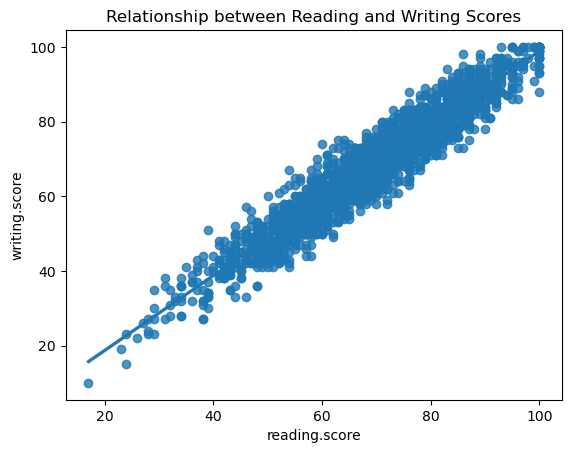

In [128]:
# Variable of interest- writing score and reading score
# Determining the relationship between writing and reading score
# Data Visualization- regplot
sns.regplot(x='reading.score',y='writing.score',data=combined_dfs)
plt.title('Relationship between Reading and Writing Scores')


To further test the analysis, I will run a linear regression analysis to test whether Reading scores is a good predictor of writing scores.

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([ 17,  23,  24, ..., 100, 100, 100])),
 (14.640028400439382, 69.0855, 0.9970088418327032))

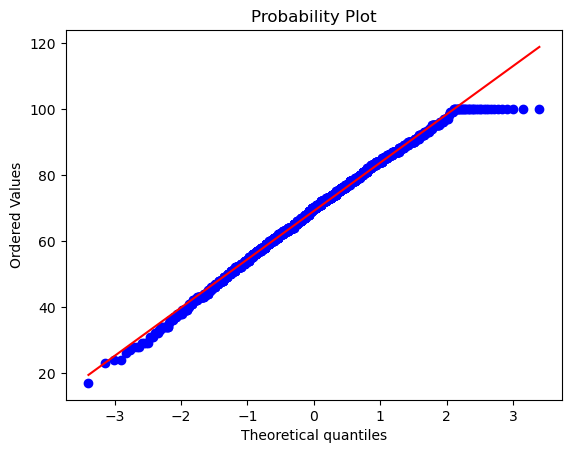

In [129]:
# LINEAR REGRESSION
# Testing the normality
ss.probplot(combined_dfs['reading.score'],dist='norm',plot=plt)

The reading score is normaly distributed based on the output above

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([ 10,  15,  19, ..., 100, 100, 100])),
 (15.369332632079928, 67.896, 0.9969711451042851))

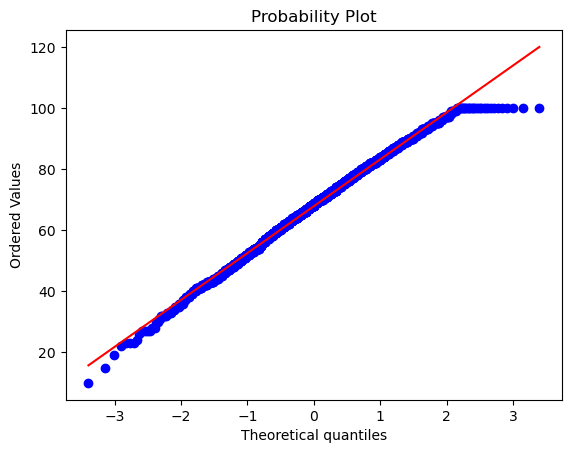

In [130]:
ss.probplot(combined_dfs['writing.score'],dist='norm',plot=plt)

The writing score is normally distributed based on the information above.

In [131]:
#Testing correlation
combined_dfs[['reading.score','writing.score']].corr()

,reading.score,writing.score
reading.score,1.000000,0.954392
writing.score,0.954392,1.000000


Interpretation: reading.score and writing.score have a strong positive relationship of .95.

In [132]:
linregresults=ss.linregress(x=combined_dfs['reading.score'],y=combined_dfs['writing.score'])
print(linregresults.rvalue, linregresults.pvalue)
print('reading score explains', linregresults.rvalue**2, '% of the variance in writing score')

0.9543916880733533 0.0
reading score explains 0.9108634942635049 % of the variance in writing score


Interpretation: The pvalue is 0.0 indicating the observed result is highly significant

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score,year,Total_Score,predicted,residuals
0,male,group A,high school,standard,completed,67,67,63,year 1,197,65.806385,-2.806385
1,female,group D,some high school,free/reduced,none,40,59,55,year 1,154,57.790598,-2.790598
2,male,group E,some college,free/reduced,none,59,60,50,year 1,169,58.792571,-8.792571
3,male,group B,high school,standard,none,77,78,68,year 1,223,76.828091,-8.828091
4,male,group E,associate's degree,standard,completed,78,73,68,year 1,219,71.818225,-3.818225


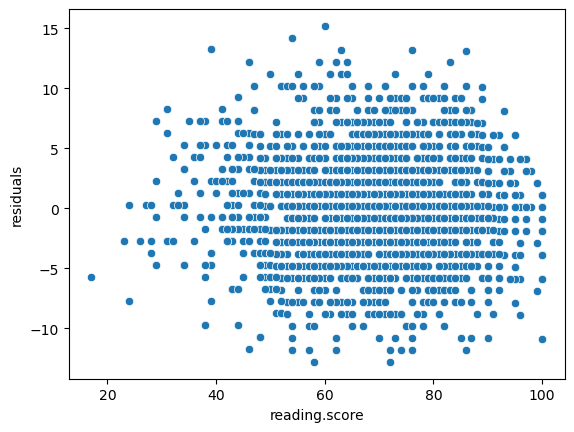

In [133]:
#Heteroscedasticity
combined_dfs['predicted']=linregresults.intercept + (linregresults.slope*combined_dfs['reading.score'])

combined_dfs['residuals']=combined_dfs['writing.score']-combined_dfs['predicted']
sns.scatterplot(y=combined_dfs['residuals'],x=combined_dfs['reading.score'])
combined_dfs.head()

### **Analysis 3:** Determine if the rate of test preparation differs by one of the other categorical variables (pick either gender, race.ethnicity, parental.level.of.education, lunch, or year)

Text(0.5, 1.0, 'Comparison of test.preparation.course and race.ethnicity')

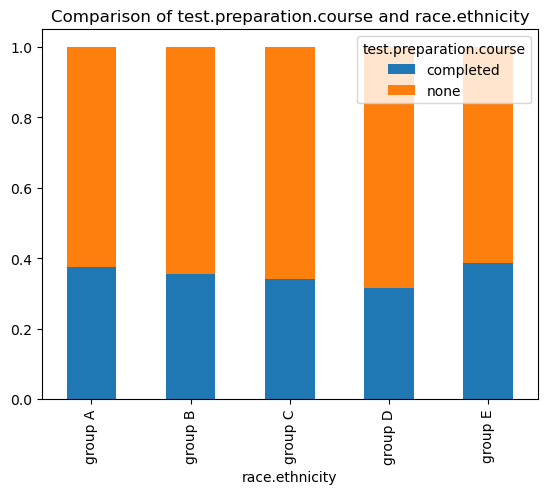

In [134]:
# Variable of interest- race.ethnicity
# Determining if the rate of preparation differs in gender
# Using stacked bar chart
cross_tab = pd.crosstab(combined_dfs['race.ethnicity'], combined_dfs['test.preparation.course'], normalize='index')
cross_tab.plot(kind='bar', stacked=True)
plt.title('Comparison of test.preparation.course and race.ethnicity')

In [135]:
# Chi-test
chi_test=pd.crosstab(index=combined_dfs['race.ethnicity'],columns=combined_dfs['test.preparation.course'])
print(chi_test)

test.preparation.course  completed  none
race.ethnicity                          
group A                         63   105
group B                        140   255
group C                        219   423
group D                        166   358
group E                        105   166


In [136]:
contigency_test=ss.chi2_contingency(chi_test)
print(contigency_test)

Chi2ContingencyResult(statistic=4.843731786341835, pvalue=0.3037106293386827, dof=4, expected_freq=array([[ 58.212 , 109.788 ],
       [136.8675, 258.1325],
       [222.453 , 419.547 ],
       [181.566 , 342.434 ],
       [ 93.9015, 177.0985]]))


Interpretation: The p-value is greater than .05; Hence fail to reject null.

Conclusion: Based on the chi-test, there is no significant association between test preparation and race, hence the rate of preparation across race/ethnicity does not differ

### **Future Directions:** List at least 2 future analyses you would conduct on this data to try to derive meaning from the results.


1. In my upcoming analyses, I plan to investigate if the patterns of test preparation vary based on gender. There is a possibility that female students may exhibit a higher tendency to prepare for tests compared to male students.

2. I aim to assess whether students who completed their test preparations achieved higher total scores. It is anticipated that students who completed their test preparations are more inclined to attain higher scores.